In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import h5py
import os
os.environ['DISPLAY'] = 'localhost:10.0'
os.chdir('/home/ishan/honors_thesis/scripts')
from scripts import dlc_rnn, utils
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import ndimage

In [3]:
trainX = h5py.File('/home/ishan/honors_thesis/Xtrain.h5', 'r')['joint_angles'][:]
trainY = h5py.File('/home/ishan/honors_thesis/Ytrain.h5', 'r')['joint_angles'][:]

valX = h5py.File('/home/ishan/honors_thesis/Xval.h5', 'r')['joint_angles'][:]
valY = h5py.File('/home/ishan/honors_thesis/Yval.h5', 'r')['joint_angles'][:]

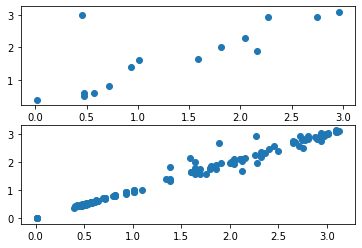

In [4]:
t = 5020
%matplotlib inline
fig, axes = plt.subplots(2,1)
ax = axes[0]
ax.scatter(trainX[t, -1, ::2], trainX[t, -1, 1::2])

ax = axes[1]
ax.scatter(trainY[t, ::2], trainY[t, 1::2])


In [12]:
%matplotlib agg

model = dlc_rnn.LSTM1Dense1(trainX=trainX, trainY=trainY, valX=valX, valY=valY, gputouse=1, task='fly')
model.train(epochs=2500)

Training: 100%|██████████| 2500/2500 [3:15:52<00:00,  4.70s/it]  
